# Exploratory Data Analysis of EEG data for Early Alzheimer's Detection

# 0. Limitations

Due to the research topic being focused on a specific subset of subjects, namely, subjects with MCI who later converted to Alzheimer's, the sample size was small.

For confidentiality reasons I cannot include ADNI datasets in this repository. They can be requested from https://adni.loni.usc.edu/



# 1. Introduction

## 1.1 Research Topic

In my research proposal I put together databases from ADNI and OCEAN which invovled a range of longitudinal data pertaining to indicivuals with an Alzheimer's Disease (AD) diagnosis and individuals with Mild Cognitive Impairment (MCI) who were eiter later diagnosed with AD or stayed with MCI. I investigated the relationships between variables, in order to  apply a range of state-of-the-art (SOTA) Artificial Intelligence (AI) techniques andtest their efficacy in predicting MCI cases that would progress to AD/test the predictive power of each feature.

progressive MCI (pMCI) and stable MCI (sMCI). - is there a difference?

Alzheimer's is a neurodegenerative disorder that most often occurs in older adults and is the most common form of dementia (https://www.cdc.gov/aging/dementia/index.html#:~:text=Dementia%20is%20not%20a%20specific,a%20part%20of%20normal%20aging.). As life expectancy continues to increase cases of AD are expected to triple by 2050 (Barnes and Yaffe, 2011), which makes it is both a personal health and socioeconomic issue. Though there are new treatments being developed and treatments currently being used, there is currently no cure, therefore the stage of progression of the disease plays a role in the effectiveness of said treatments as they can only slow down progression. The earlier a person can be treated the better quality of life they can have, the problem is that, at present, it is not possible for a human to diagnose AD without analysing symptoms, and by that point they would have already developed significant neurodegeration.

Cognitinve decline is a normal part of aging, however MCI is a type of impairment that is more severe than normal aging but less severe than dementia; individuals can recover from MCI or remain stable, they can also develop Alzheimer's after being diagnosed with MCI. At this stage, treatment would greatley effect their quality of life and could even prevent them from developning Alzheimer's but it is unclear what seperates MCI patients who develop AD and those who do not.

OCEAN and ADNI have formed datasets from MRI data and a range of information such as education level and cognitve test scores, from participants over a period of years. Recent studies explore different features from these datasets using different SOTA AI algoritms and methods including Convolutional Neural Netowrks (CNN) and Support Vector Machines (SVM). These studies usually report accuracy of the models but do not solely focus on which features would lead to the highest predictive power. Although, one study found higher accuracy when the data was combined with neuropsychological test results (Machine learning framework for early MRI-based Alzheimer's conversion prediction in MCI subjects). To my knwoledge there are no studies which focus solely on the predictive power of features.

The reason we conducted this Exploratory Data Analysis process is to state the relationship of data explicitly through a graph so that we could assume the correlations before data extraction or data analysis. It might help us to understand the nature of the data and to select the appropriate analysis method for the model later.

I aim to predict how many days it may take an individual to develop a certain diagnosis based on their brain scan and MMSE scores. To my knowledge, this factor has not been used in the development of AI models

# Magnetic Resonance Imaging (MRI)

MRI is a non-invasive neurimaging technique that relies on the magnetic field of atoms within the brain. 
Good alternative to techniques such as Positron Electron Tomography which invovles the administration of a radioavtive substance. 

<img src="images/MRIAD.png">

Above is an example of an image produced by an MRI scan. There is a slight difference between these two images, namely, the grey area, knwno as grey and white matter, has significantly atrophied in the subject with Alzheimer's. The aim is to train a ML algorithm to learn the complex pattern between different MRI scans for classification.


# Objectives

I intend to form a data pipeline to be used for a machine learning algorithm. Data will be grouped on conversion status, namely, whether subjects converted from MCI to AD or remained stable. Insights will be drawn from their brain and intracranial volume data as well as the temporal differences between scans. 

I aim to collect this data in order to form a ML algorithm that predicts whether a subject with MCI will convert to AD and the amount of days they are predicted to convert.

# 2. Method



## 2.1 Description of dataset

The data used in this project was obtained from two sources, OASIS and ADNI.

## Oasis Dataset

* Two datasets were put together: Longitudinal and cross sectional
    * the longitundinal dataset consists of 150 subjects aged 60 to 96 who had MRI scans on multiple occasions
    * the cross sectional dataset consists of 416 subjects aged 18 to 96 who had MRI scans on one occasion
    
### Brief description of columns

|Column  |Desc  |
|-------|-------|
|EDUC   |Years of education       |
|SES    |Socioeconimic status       |
|MMSE   |Mini Mental State Examination
|CDR    |Clinical Dementia Rating
|eTIV   |Estimated Total Intracranial Volume
|nWBV   |Normalized Whole Brain Volume
|ASF    |Atlas Scaling Factor
|Hand   |Right or Left Handed
|MR_Delay| Time Between Scans Measured in Days

### Further descriptions

#### MMSE
The Mini Mental State Examination is scored from 0 to 30, 0 being a low score and 30 being a high score. It is an examination of mental state pertaining to cognitive function.

#### CDR
The clinical dementia rating used in this dataset is a global rating based on six cognitive and behavioural domains. a CDR of 0 indicates no dementia, a CDR of 0.5 is often attributed to MCI but has also been attributed to very mild alzheimer's, a CDR of 1 or above is uniersally attributed to Alzheimrs.

#### eTIV
eTIV is a standardised measure of intracranial volume which was scaled via the ASF in order to account for different head sizes. eTIV accounts for grey matter, white matter and cerebrospinal fluid

#### nWBV
nWBV is a normalized measure which was computed via the FST software suite, it computes the probability that a voxel is grey or white matter. It represents the proportion of grey and white matter voxels in the eTIV. The unit of normalized volume is percent

## ADNI Dataset

### Brief description of columns

|Column  |Desc  |
|-------|-------|
|RID   |Roster ID (Subejct ID)|
|CDGLOBAL    |Global Clinical Dementia Rating        |
|EXAMDATE   |Date of Scan
|EICV    |Estimated Intracranial Volume
|BRAINVOL   | Whole Brain Volume
|MMSE   | Mini Mental State Examination


### Further descriptions

#### RID
Multiple ID's were generated for subjects between scans, their RID remained the same

#### EICV & BRAINVOL
These measures use a different scaling method than OASIS

# Rationale for the use of these datasets

A relational database method was used for this project. I aimed to use multiple datasets in order to increase sample size, however, differnent standardization methods were used for the analysis of MRI so I analysed both datasets seperatley. 

As MMSE scores are uinversal this data was combined across datasets

# Rationale for the use of pandas

The datasets used in this project consist of identical ID's for different data. Pandas is able to compute row-wise metadata which greatly assisted in grouping and selecting data from groups. It is also compatible with numpy, which is a library that assisted in numerical operations on data

## 2.1 Data cleaning and preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import scipy.stats as stats
from sklearn.utils import shuffle
from sklearn import linear_model
import seaborn as sns
from datetime import date
# numbers will be displayed up to 3 decimal places, with no scientific notation
pd.options.display.float_format = '{:.3f}'.format

#convert MRI csv files to pandas Dataframe
df1 = pd.read_csv("oasis_longitudinal.csv")
df2 = pd.read_csv("oasis_cross-sectional.csv")

#only select relevant fields from dataset
fields1 = ['RID','CDGLOBAL','EXAMDATE']
CDR_df = pd.read_csv("CDR.csv",usecols=fields1)

fields2 = ['RID','EICV','EXAMDATE']
IV_df = pd.read_csv("UCSDVOL.csv",usecols=fields2)

fields3 = ['RID','BRAINVOL','EXAMDATE']
BV_df = pd.read_csv("FOXLABBSI_04_29_22.csv",usecols=fields3)

fields4 = ['RID','MMSE','EXAMDATE','AGE']
MMSE_df = pd.read_csv("ADNIMERGE.csv",usecols=fields4)

I will be creating one dataframe using all data, so I will prepare each dataframe

All dataframes will be formatted to match df1

# OASIS cross-sectional dataframe

Rationale for removing columns:
1. all subjects are right handed
2. Although previous research has discovered a link between education level, socioeconimic status, Gender and alzheimers (reference), these variables provide grounds for discrimination, which has been observed in machine learning methods (reference). Additionally, the algorithm could misclassify individuals who have high SES and EDUC values. If a machine learning algorithm cannot accuratleyt predict alzheimers using neuroimaging and cogntive examination data, more data would need to be obtained or it may be possible that AI is not a suitable method for thsi task.


In [12]:
df2.drop(['Hand','Educ','SES','M/F'], axis=1,inplace=True)

# I will be analysing data for subjects aged 50-100
df2.drop(df2[(df2['Age'] < 50)].index, inplace=True)

# rename columns to match df1
df2 = df2.rename(columns= {'ID':'MRI_ID','Delay':'MR_Delay'})

# creates a column called Group to match df1, will use CDR data to form groups
df2["Group"] = np.nan

# creates a column called Subject_ID which matches the first 9 characters of MRI_ID, this organisation of 
# subject id's will greatly help later
df2["Subject_ID"] = df2['MRI_ID'].str[0:9]


# change NaN values in the Delay column to 0 as this signifies their first visit/no delay between preivous visit
# all subjects in this dataset had only 1 scan
df2["MR_Delay"] = df2["MR_Delay"].fillna(0)

print(df2.head())

          MRI_ID  Age   MMSE   CDR  eTIV  nWBV   ASF  MR_Delay  Group  \
0  OAS1_0001_MR1   74 29.000 0.000  1344 0.743 1.306     0.000    NaN   
1  OAS1_0002_MR1   55 29.000 0.000  1147 0.810 1.531     0.000    NaN   
2  OAS1_0003_MR1   73 27.000 0.500  1454 0.708 1.207     0.000    NaN   
8  OAS1_0010_MR1   74 30.000 0.000  1636 0.689 1.073     0.000    NaN   
9  OAS1_0011_MR1   52 30.000 0.000  1321 0.827 1.329     0.000    NaN   

  Subject_ID  
0  OAS1_0001  
1  OAS1_0002  
2  OAS1_0003  
8  OAS1_0010  
9  OAS1_0011  


# OASIS longitudinal dataframe

In [13]:
#df1.drop(['Hand','EDUC','SES','M/F'],axis=1,inplace=True)
# rename ID column of df1 to remove space
df1.columns = df1.columns.str.replace(' ','_')
print(df1.head())


  Subject_ID         MRI_ID        Group  Visit  MR_Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

    SES   MMSE   CDR  eTIV  nWBV   ASF  
0 2.000 27.000 0.000  1987 0.696 0.883  
1 2.000 30.000 0.000  2004 0.681 0.876  
2   NaN 23.000 0.500  1678 0.736 1.046  
3   NaN 28.000 0.500  1738 0.713 1.010  
4   NaN 22.000 0.500  1698 0.701 1.034  


# CDR data from ADNI database

In [14]:
def change_columns(dataframe,olddatacolumn,newdatacolumn):
    dataframe = dataframe.rename(columns= {'RID':'Subject_ID','EXAMDATE':'MR_Delay', olddatacolumn:newdatacolumn},inplace=True)

change_columns(CDR_df,'CDGLOBAL','CDR')

# all missing values in the MR_Delay column will be set to 0 meaning I will set it to their first scan, 
# if data in subsequent dataframes with no date match the ID number they will replace eachother and 
# only one value will be used as multiple ID's are meaningless without dates
def fillna(dataframe):
    dataframe['MR_Delay'] = dataframe['MR_Delay'].fillna(0)

fillna(CDR_df)
# fill missing values in MR_Delay column with 0 to signify day 0, if data in subsequent dataframes with no 
# date matches the ID numbers they will replace eachother and only one values will be used as multiple ID's 
# are meaningless without dates 



# Intracranial Volume data from ADNI database

In [15]:
IV_df = IV_df.rename(columns= {'RID':'Subject_ID','EXAMDATE':'MR_Delay'})
fillna(IV_df)



# Brain Volume data from ADNI database

In [4]:
BV_df = BV_df.rename(columns= {'RID':'Subject_ID','EXAMDATE':'MR_Delay'})
fillna(BV_df)


# MMSE data from ADNI database

In [5]:
change_columns(MMSE_df,'AGE','Age')
fillna(MMSE_df)


# Combining ADNI data

In [6]:
# performs outer merge on all dataframes at once, on Subject_ID and MR_Delay, so if a row matches the 
# subject id AND MR_Delay of the MMSE_df subsequent columns belong to that ID on that date
ADNI = pd.merge(pd.merge(pd.merge(MMSE_df,IV_df, how='outer',on=['Subject_ID','MR_Delay']),BV_df,how='outer',on=['Subject_ID','MR_Delay']),CDR_df,how='outer',on=['Subject_ID','MR_Delay'])

#Missing values in CDR make the whole row meaningless as this gives diagnosis
ADNI.dropna(subset='CDR',inplace=True)

# if more than 4 rows are missing the whole row will be removed
ADNI.dropna(thresh=4,inplace=True)




In [7]:
# this is done to aid the formatting of subject id column
ADNI = ADNI.astype({'Subject_ID':str})

In [8]:
# takes each value and compares it to every other value to see if they have matching ID's, 
# if the ID's match and the value has not already been formatted it will be formatted to match df1 
# this will make grouping and selecting data from groups simpler
for i in range(len(ADNI)):
    for j in range(len(ADNI)):
        if ADNI.iloc[i,0] == ADNI.iloc[j,0]:
            if ADNI.iloc[j,0][0] != 'O':
                ADNI.iloc[j,0] = 'OAS3_'+ADNI.iloc[i,0]

In [9]:
# preparing to convert MR_Delay column to days between scans
ADNI['MR_Delay'] = pd.to_datetime(ADNI['MR_Delay'])
ADNI.reset_index(inplace=True)


In [10]:
date1 = ADNI.groupby(['Subject_ID']).MR_Delay.first()
date1index = date1.index
date2 = ADNI.iloc[0,1]

# Checks for matching Subject ID's, if they match it will calculate the days between the first instance 
# of the ID and the instance it is on
for i in range(len(date1)):
    for j in range(len(ADNI)):
        if date1index[i]==ADNI.iloc[j,0]:
            ADNI.iloc[j,1]= (ADNI.iloc[j,1]-date1[i]).days



# Joined DataFrame

In [16]:
# appends dataframes without causing multiple identical indexes
MRI = df1.append(df2, ignore_index=True)
MRI = MRI.append(ADNI, ignore_index=True)

# diagnosis based on CDR score
MRI.loc[MRI['CDR'] == 0, 'Group'] = 'ND'
MRI.loc[MRI['CDR'] == 0.5, 'Group'] = 'MCI'
MRI.loc[MRI['CDR'] == 1, 'Group'] = 'AD'
MRI.loc[MRI['CDR'] == 2, 'Group'] = 'AD'
MRI.loc[MRI['CDR'] == 3, 'Group'] = 'AD'




/var/folders/96/ntd6ngxn5klgfg7ylpwj8n_h0000gn/T/ipykernel_3106/3196473674.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MRI = df1.append(df2, ignore_index=True)
/var/folders/96/ntd6ngxn5klgfg7ylpwj8n_h0000gn/T/ipykernel_3106/3196473674.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MRI = MRI.append(ADNI, ignore_index=True)


In [15]:
# function to find out whether the amount of missing values in one column correspond with missing values in 
# another column
def MissingDataInfo(column1, column2):
    table = MRI.loc[MRI[column1].isna(), [column2]]
    len_table = len(table)
    missing_column2 = len(MRI[MRI[column2].isna()])
    print(f"There are {len_table} missing values in {column1} with {missing_column2} missing values in {column2}")

MissingDataInfo('CDR', 'Group')
MissingDataInfo('MMSE', 'Group')
MissingDataInfo('eTIV','nWBV')
MissingDataInfo('ASF','eTIV')
MissingDataInfo('BRAINVOL','EICV')



There are 11 missing values in CDR with 49 missing values in Group
There are 106 missing values in MMSE with 49 missing values in Group
There are 3010 missing values in eTIV with 3010 missing values in nWBV
There are 3010 missing values in ASF with 3010 missing values in eTIV
There are 2076 missing values in BRAINVOL with 2327 missing values in EICV


# Preliminary analysis of missing values

The missing values in CDR and Group will be kept for now as I may be using an unsuperivised learning algorithm, however I will change them from NaN to U for undiagnosed

I may not be using the MMSE column as the purpose of the subsequent machine learning algorithm is to speed up the process of diagnosing alzheimer's to allow individuals to be diagnosed earlier, the MMSE is an assesment conducted by clnicians, thus, it will be better if the algorithm could run without this variable. I will be exploring this variable further later in the EDA but for now I will keep the rows with missing values in place

The missing values in the brain scan columns are due to the different datasets, this will be accounted for in later analysis.



In [16]:
# rows with missing values in CDR column changed to group U
MRI.loc[MRI['CDR'].isna(), 'Group'] = 'U'
MRI.loc[MRI['Group'].isna(), 'Group'] = 'U'
MissingDataInfo('CDR', 'Group')

# There are now 0 missing values in Group

There are 11 missing values in CDR with 0 missing values in Group


# Preparing to create converted column

In [17]:
# create a column called counts which groups the Subject_ID column and counts the amount of unique values in 
# each group, this tells me which subjects' diagnosis changed between scans

# used transform on nunique instead of nunique by itself as nunique returns a series which results in NAN values 
#if there are no unique values in Group and does not return series of the same length as MRI, transform duplicates 
# the MRI dataframe with the new column which is more convinient as I do not have to manually change NAN values to 
# 0 or 1 

counts = MRI.groupby('Subject_ID').Group.transform('nunique')
MRI['counts'] = counts

# just to double check that there are no NAN values in count
print(MRI[MRI.counts.isna()])

# this prints the rows/subjects who had more than 1 scan and converted between those scans, just to check that 
# there is data here
print(MRI[MRI.counts > 1].head())

Empty DataFrame
Columns: [Subject_ID, MRI_ID, Group, Visit, MR_Delay, M/F, Hand, Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF, index, EICV, BRAINVOL, counts]
Index: []
   Subject_ID         MRI_ID Group  Visit MR_Delay M/F Hand    Age   EDUC  \
7   OAS2_0005  OAS2_0005_MR1    ND  1.000    0.000   M    R 80.000 12.000   
8   OAS2_0005  OAS2_0005_MR2   MCI  2.000 1010.000   M    R 83.000 12.000   
9   OAS2_0005  OAS2_0005_MR3    ND  3.000 1603.000   M    R 85.000 12.000   
10  OAS2_0007  OAS2_0007_MR1   MCI  1.000    0.000   M    R 71.000 16.000   
11  OAS2_0007  OAS2_0007_MR3    AD  3.000  518.000   M    R 73.000 16.000   

     SES   MMSE   CDR     eTIV  nWBV   ASF  index  EICV  BRAINVOL  counts  
7  4.000 28.000 0.000 1689.000 0.712 1.039    NaN   NaN       NaN       2  
8  4.000 29.000 0.500 1701.000 0.711 1.032    NaN   NaN       NaN       2  
9  4.000 30.000 0.000 1699.000 0.705 1.033    NaN   NaN       NaN       2  
10   NaN 28.000 0.500 1357.000 0.748 1.293    NaN   NaN       NaN  

# Subjects that converted

I can now create a column that will identify the subjects that converted between scans
This column will contain numerical values that pertain to a specific conversion

No conversion = 0

ND -> MCI = 1

ND -> AD = 2

MCI -> AD = 3

MCI -> ND = 4

AD -> MCI = 5

AD -> ND = 6


It is highly unlikely that a subject could convert from AD to MCI or AD to ND unless they were on a new experimental treatment, as alzheimer's is a progressive neurodegenerative disease. It is also unlikely that a subject could convert from MCI to ND but this case is more likely. I have included these keys for completeness, though, subjects in these groups are more likely the result of a data entry error so if any of these keys show up I will investigate further

In [18]:
# create a column for Converted groups
MRI['Converted'] = np.nan

In [ ]:
IDGROUPED = MRI.groupby('Subject_ID', as_index=True)

# created a column that counts the amount of times a subject had an MRI, although I will not be using this 
# column as I will be taking the first and last value of each group as long as they had more than 1 scan
# it may be useful for later projects 

num_MRI = IDGROUPED.Subject_ID.transform('count')
MRI['num_MRI'] = num_MRI

In [ ]:
# grouped subjects by the amount of scans they had then picked the first and last subject ID
multigroup_first = MRI.groupby(['Subject_ID','counts'], as_index=True).Group.first()
multigroup_last = MRI.groupby(['Subject_ID','counts'], as_index=True).Group.last()

# helped to find indices
multigroupdict = multigroup.indices



# Fill converted column

In [217]:
# those with only one diagnosis did not convert
MRI.loc[MRI['counts'] == 1, 'Converted']=0
    
# There is an option to print values using this function to check that everything has been coded correctly
def ConvertedCalculator(diagnosis1,diagnosis2, counts):
    # finds converted group using diagnosis and prints group that is called
    Converted_dict = {('ND','MCI'):1, ('ND','AD'):2, ('MCI','AD'):3, ('MCI','ND'):4, ('AD','MCI'):5, ('AD','ND'):6}
    group = Converted_dict[(diagnosis1,diagnosis2)]
    #print(f"Converted Group: {group}")
    
    count = -1
    # allows me to call index 
    erm = multigroup_first.index.get_level_values(0)
    # uses regex to locate the index of a subject id within the called group
    first = multigroup_first.filter(regex="'OAS\d_\d{1,}',"+ counts)
    firstindex = first.index.get_level_values(0)
    last = multigroup_last.filter(regex="'OAS\d_\d{1,}',"+ counts)
    for i in range(len(first)):
                # counts the index so value can be printed
                count += 1
                if (first[i] == diagnosis1) & (last[i] == diagnosis2):
                    #print(firstindex[i]) 
                    #print(multigroup_first.filter(regex="'OAS\d_\d{1,}',"+ counts).iloc[count:count+1])
                    #print(multigroup_max.filter(regex="'OAS\d_\d{1,}',"+ counts).iloc[count:count+1])
                    
                    #looks for subject id or specified index and updates converted column using group dictionary
                    MRI.loc[MRI['Subject_ID'] == firstindex[i], 'Converted']=group
                    #print("done")
                    # if first and last diagnoses are the same it means that they had a different diagnosis inbetween
                    # these subjects will be put in no conversion group
                elif (first[i] == diagnosis1) & (last[i] == diagnosis1):
                    MRI.loc[MRI['Subject_ID'] == firstindex[i], 'Converted']=0
                    # undiagnosed subjects put in converted group none
                elif (first[i] == 'U') | (last[i] == 'U'):
                    MRI.loc[MRI['Subject_ID'] == firstindex[i], 'Converted']='none'
    # prints a space between each group for readability         
    # print("\n")


In [216]:
# prints the amount of rows for subjects who had 1 or more diagnosis', shows me where the function should stop
# no subjects had more than 4 diagnosis so I will stop calling the function at 4
def groups(counts):
    print(len((MRI.loc[MRI['counts']==counts])))

# the column of interest is counts as this column signifies which subjects diagnosis changed    
groups(1)
groups(2)
groups(3)
groups(4)
groups(5)
groups(6)
groups(7)
groups(8)
groups(9)



2441
1144
22
4
0
0
0
0
0


In [21]:
# Call function for each group with each number of counts
ConvertedCalculator('ND','MCI'," 2")
ConvertedCalculator('ND','AD'," 2")
ConvertedCalculator('MCI', 'AD'," 2")
ConvertedCalculator('MCI','ND'," 2")
ConvertedCalculator('AD','MCI'," 2")
ConvertedCalculator('AD','ND'," 2")

ConvertedCalculator('ND','MCI'," 3")
ConvertedCalculator('ND','AD'," 3")
ConvertedCalculator('MCI', 'AD'," 3")
ConvertedCalculator('MCI','ND'," 3")
ConvertedCalculator('AD','MCI'," 3")
ConvertedCalculator('AD','ND'," 3")

ConvertedCalculator('ND','MCI'," 4")
ConvertedCalculator('ND','AD'," 4")
ConvertedCalculator('MCI', 'AD'," 4")
ConvertedCalculator('MCI','ND'," 4")
ConvertedCalculator('AD','MCI'," 4")
ConvertedCalculator('AD','ND'," 4")
print(MRI.loc[MRI['Subject_ID'] == 'OAS2_0066'])

    Subject_ID         MRI_ID Group  Visit MR_Delay    Age   MMSE   CDR  \
139  OAS2_0066  OAS2_0066_MR1    AD  1.000    0.000 61.000 30.000 1.000   
140  OAS2_0066  OAS2_0066_MR2   MCI  2.000  497.000 62.000 30.000 0.500   

        eTIV  nWBV   ASF  EICV  BRAINVOL  counts Converted  num_MRI  
139 1957.000 0.734 0.897   NaN       NaN       2         5        2  
140 1928.000 0.731 0.910   NaN       NaN       2         5        2  


# Check if there are any NaN values in Converted column

In [22]:
print(MRI.loc[MRI['Converted'].isna()])


Empty DataFrame
Columns: [Subject_ID, MRI_ID, Group, Visit, MR_Delay, Age, MMSE, CDR, eTIV, nWBV, ASF, EICV, BRAINVOL, counts, Converted, num_MRI]
Index: []


# Univariate outliers

# Converted subjects

Subjects who converted from AD to MCI (group 5) or AD to ND (group 6) may signifiy an outlier as this would be extremely rare

Subjects who converted from MCI to ND (Group 4) may also singify an outlier but this is less rare

If there are enough participants I may do further analysis on these groups

In [218]:
# prints the amount of individual and unique values in converted group 4
print(len(MRI[MRI['Converted']==4]))
convertedgroupby = MRI.groupby(['Subject_ID','Converted']).Subject_ID.first()
print(len(convertedgroupby.filter(regex="'OAS\d_\d{1,}', 4")))


73
16


In [219]:
print(MRI[MRI['Subject_ID']=='OAS2_0131'])
print(df1[df1['Subject_ID']=='OAS2_0131'])
print("\n")
print("Descriptives for MCI")
print(MRI.loc[MRI['Group']=='MCI', 'eTIV'].describe())
print(MRI.loc[MRI['Group']=='MCI', 'nWBV'].describe())
print("\n")
print("Descriptives for ND")
print(MRI.loc[MRI['Group']=='ND', 'eTIV'].describe())
print(MRI.loc[MRI['Group']=='ND', 'nWBV'].describe())
print("\n")
print("Descriptives for AD")
print(MRI.loc[MRI['Group']=='AD', 'eTIV'].describe())
print(MRI.loc[MRI['Group']=='AD', 'nWBV'].describe())
print("\n")
print("Descriptives for ND")
print(MRI.loc[MRI['Group']=='ND', 'MMSE'].describe())
print("\n")
print("Descriptives for MCI")
print(MRI.loc[MRI['Group']=='MCI', 'MMSE'].describe())
print("\n")
print("Descriptives for AD")
print(MRI.loc[MRI['Group']=='AD', 'MMSE'].describe())



    Subject_ID         MRI_ID Group  Visit MR_Delay    Age   MMSE   CDR  \
271  OAS2_0131  OAS2_0131_MR1   MCI  1.000    0.000 65.000 30.000 0.500   
272  OAS2_0131  OAS2_0131_MR2    ND  2.000  679.000 67.000 25.000 0.000   

        eTIV  nWBV   ASF  EICV  BRAINVOL  counts Converted  num_MRI  
271 1340.000 0.754 1.309   NaN       NaN       2         4        2  
272 1331.000 0.761 1.318   NaN       NaN       2         4        2  
    Subject_ID         MRI_ID      Group  Visit  MR_Delay  Age   MMSE   CDR  \
271  OAS2_0131  OAS2_0131_MR1  Converted      1         0   65 30.000 0.500   
272  OAS2_0131  OAS2_0131_MR2  Converted      2       679   67 25.000 0.000   

     eTIV  nWBV   ASF  
271  1340 0.754 1.309  
272  1331 0.761 1.318  


Descriptives for MCI
count    192.000
mean    1483.281
std      175.267
min     1143.000
25%     1350.750
50%     1463.000
75%     1585.000
max     1992.000
Name: eTIV, dtype: float64
count   192.000
mean      0.724
std       0.034
min       0.644
25% 

According to the dataframe Subject 0131 from OAS2 converted from MCI to ND, however, their MMSE score decreased from 30 to 25 which would indicate their cognitive mental state decreased significantly. As MMSE scores are interval data I will round the mean values to 0 decimal places, the meam MMSE score for subjects with a CDR of 0 (ND) within this sample is 29 $\pm$ 1 and 26 $\pm$ 3 for subjects with a CDR of 0.5

I printed out the data for subject twice and checked the csv file on Excel to check if they were switched by the Converted code, nothing was switched although the subject was put in the diagnosis group 'converted' in the original dataset

Additionally, their eTIV (estimated total intracranial volume) seems to have decreased between their diagnosis of MCI to AD which suggests that their intracranial volume decreased, however their nWBV values slightly increased. as nWBV represents the percentage of brain volume in the eTIV, the data for this participant suggests that brain volume slightly increased while a feature representing intracranial volume but not brain volume, meninges or cerebrospinal fluid, decreased. However, as eTIV and nWBV are estimated and normalized values it is also possible that there was no significant difference in their brain and intracranial volumes.

I aimed to use the descriptive statistics to see whether these values were within the range for each diagnosis, as I was only looking at the values within each feature I decided to look at the descriptive statistics for eTIV and nWBV to determine whether their brain volume data are within the range of an MCI and ND patient. However, the descriptive statistics show that there is some overlap in the brain volumes of subjects in these groups, there is also overlap in the brain volumes of Subject 0131 with MCI and ND; while they were diagnosed with MCI their nWBV was within 1 standard deviation (std) of the mean of subjects with MCI within this sample, and slightly above the third quartile but not above the maximum value of subjects with MCI within this sample, they were also within 1 std of the mean of subjects with ND within this sample and within the third quartile, this pattern persists for all brain volume data while they were diagnosed with MCI and ND, in other words thier brain volume data seems to be within the range of both MCI and ND samples. 

As they were given a lower MMSE score, a score indicative of MCI, after converting from a CDR of 0.5 to 0, it is possible that there was a data entry error and this participant was given a CDR of 0 on their first scan and 0.5 on their second scan. It is also possible that they were given a CDR of 0.5 or 0 at both scans. With MMSE scores of 30 and 25 it is more likely that they were given a CDR of 0.5 at both scans. 

Thus, I will keep this subject in the dataframe for now and keep their values as they are, but I will not perform analysis on converted group 4. There is also not enough data in this group

In [ ]:
print(MRI[MRI['Converted']==5])

In [221]:
print(MRI[MRI['Subject_ID']=='OAS2_0064'])
print(df1[df1['Subject_ID']=='OAS2_0064'])

    Subject_ID         MRI_ID Group  Visit MR_Delay    Age   MMSE   CDR  \
136  OAS2_0064  OAS2_0064_MR1    AD  1.000    0.000 78.000 23.000 1.000   
137  OAS2_0064  OAS2_0064_MR2   MCI  2.000  830.000 81.000 26.000 0.500   
138  OAS2_0064  OAS2_0064_MR3   MCI  3.000 1282.000 82.000 18.000 0.500   

        eTIV  nWBV   ASF  EICV  BRAINVOL  counts Converted  num_MRI  
136 1462.000 0.691 1.200   NaN       NaN       2         5        3  
137 1459.000 0.694 1.203   NaN       NaN       2         5        3  
138 1464.000 0.682 1.199   NaN       NaN       2         5        3  
    Subject_ID         MRI_ID     Group  Visit  MR_Delay  Age   MMSE   CDR  \
136  OAS2_0064  OAS2_0064_MR1  Demented      1         0   78 23.000 1.000   
137  OAS2_0064  OAS2_0064_MR2  Demented      2       830   81 26.000 0.500   
138  OAS2_0064  OAS2_0064_MR3  Demented      3      1282   82 18.000 0.500   

     eTIV  nWBV   ASF  
136  1462 0.691 1.200  
137  1459 0.694 1.203  
138  1464 0.682 1.199  


According to the data, Subject 0066 from OAS2, converted from a CDR of 1 to a CDR of 0.5. Their MMSE scores are within the ranges for both diagnosis', although, they scored lower on their final scan where they were given a CDR of 0.5.

The original dataset diagnosised this subject as Demented as a CDR of 0.5 was originally determined to be very mild dementia and 1 was determined to be mild dementia.

Additionally their eTIV and nWBV values seem within the range of AD and MCI, although their is a high degree of overlap within these ranges

Thus I will also keep this subject in the dataset for now and return to it after further analysis

In [28]:
print(MRI[MRI['Subject_ID']=='OAS2_0066'])
print(df1[df1['Subject_ID']=='OAS2_0066'])

    Subject_ID         MRI_ID Group  Visit MR_Delay    Age   MMSE   CDR  \
139  OAS2_0066  OAS2_0066_MR1    AD  1.000    0.000 61.000 30.000 1.000   
140  OAS2_0066  OAS2_0066_MR2   MCI  2.000  497.000 62.000 30.000 0.500   

        eTIV  nWBV   ASF  EICV  BRAINVOL  counts Converted  num_MRI  
139 1957.000 0.734 0.897   NaN       NaN       2         5        2  
140 1928.000 0.731 0.910   NaN       NaN       2         5        2  
    Subject_ID         MRI_ID     Group  Visit  MR_Delay  Age   MMSE   CDR  \
139  OAS2_0066  OAS2_0066_MR1  Demented      1         0   61 30.000 1.000   
140  OAS2_0066  OAS2_0066_MR2  Demented      2       497   62 30.000 0.500   

     eTIV  nWBV   ASF  
139  1957 0.734 0.897  
140  1928 0.731 0.910  


According to the data, Subject 0066 from OAS2 also converted from a CDR of 1 to a CDR of 0.5. The maximum MMSE for all groups is 30, this subject obtained this maximum on both occasions. 

Additionally, their eTIV values are extreme for this sample. While they were diagnosed with AD their eTIV was the maximum value which was 3 std above the mean with a z score of 3.12 and more than the third quartile, this value is also considered extreme when compared to the descriptive statistics for both MCI and ND samples, namely, it is above the third quartile for all groups and between 2-3 std. Their eTIV while they were diagnosed with MCI is also extreme, above the third quartile for all samples. However, their nWBV values are not extreme

This suggests that this subject had considerably higher intracranial volume than other subjects, but their grey and white matter or brain volume was not as high.



In [29]:

print(MRI[MRI['eTIV']>1900])

    Subject_ID         MRI_ID Group  Visit MR_Delay    Age   MMSE   CDR  \
0    OAS2_0001  OAS2_0001_MR1    ND  1.000    0.000 87.000 27.000 0.000   
1    OAS2_0001  OAS2_0001_MR2    ND  2.000  457.000 88.000 30.000 0.000   
39   OAS2_0021  OAS2_0021_MR1   MCI  1.000    0.000 72.000 26.000 0.500   
40   OAS2_0021  OAS2_0021_MR2   MCI  2.000 1164.000 76.000 25.000 0.500   
139  OAS2_0066  OAS2_0066_MR1    AD  1.000    0.000 61.000 30.000 1.000   
140  OAS2_0066  OAS2_0066_MR2   MCI  2.000  497.000 62.000 30.000 0.500   
167  OAS2_0077  OAS2_0077_MR2    ND  2.000 1393.000 73.000 29.000 0.000   
425  OAS1_0115  OAS1_0115_MR1   MCI    NaN    0.000 72.000 26.000 0.500   
513  OAS1_0290  OAS1_0290_MR1   MCI    NaN    0.000 83.000 26.000 0.500   

        eTIV  nWBV   ASF  EICV  BRAINVOL  counts Converted  num_MRI  
0   1987.000 0.696 0.883   NaN       NaN       1     0.000        2  
1   2004.000 0.681 0.876   NaN       NaN       1     0.000        2  
39  1911.000 0.719 0.919   NaN       Na

There are 5 other subjects who have an eTIV value above 1900, however, subject 0066 is the only one who was initially diagnosed with AD then diagnosed with MCI. As their eTIV exhibits extreme values and they were initially diagnosed with AD I will remove this subjects data

In [30]:
MRI.drop(139,inplace=True)
MRI.drop(140,inplace=True)

In [31]:
print(MRI[MRI['Converted']==6])

Empty DataFrame
Columns: [Subject_ID, MRI_ID, Group, Visit, MR_Delay, Age, MMSE, CDR, eTIV, nWBV, ASF, EICV, BRAINVOL, counts, Converted, num_MRI]
Index: []


There are no subjects in converted group 6

# Z scores

I will compute the z scores of the eTIV, nBWV for each group and analyse values that are $\pm$ 3.29

I am simply looking for outliers within each group so I will include all subjects with a specific diagnosis at any time

I will not include the undiagnosed group

In [32]:
AD_ETIV = np.array(MRI.loc[MRI['Group']=='AD', 'eTIV'])

MCI_ETIV = list(MRI.loc[MRI['Group']=='MCI', 'eTIV'])

ND_ETIV = list(MRI.loc[MRI['Group']=='ND', 'eTIV'])

IV_ZSCORE_AD = stats.zscore(AD_ETIV,nan_policy='omit')
print(IV_ZSCORE_AD[IV_ZSCORE_AD>3.28])
print(IV_ZSCORE_AD[IV_ZSCORE_AD<-3.28])


[]
[]


In [33]:
IV_ZSCORE_MCI = stats.zscore(MCI_ETIV,nan_policy='omit')
print(IV_ZSCORE_MCI[IV_ZSCORE_MCI>3.28])
print(IV_ZSCORE_MCI[IV_ZSCORE_MCI<-3.28])

[]
[]


In [34]:
IV_ZSCORE_ND = stats.zscore(ND_ETIV,nan_policy='omit')
print(IV_ZSCORE_ND[IV_ZSCORE_ND>3.28])
print(IV_ZSCORE_ND[IV_ZSCORE_ND<-3.28])

[]
[]


In [35]:
AD_NWBV = np.array(MRI.loc[MRI['Group']=='AD', 'nWBV'])

MCI_NWBV = list(MRI.loc[MRI['Group']=='MCI', 'nWBV'])

ND_NWBV = list(MRI.loc[MRI['Group']=='ND', 'nWBV'])

BV_ZSCORE_AD = stats.zscore(AD_NWBV,nan_policy='omit')
print(BV_ZSCORE_AD[BV_ZSCORE_AD>3.28])
print(BV_ZSCORE_AD[BV_ZSCORE_AD<-3.28])

[]
[]


In [36]:
BV_ZSCORE_MCI = stats.zscore(MCI_NWBV,nan_policy='omit')
print(BV_ZSCORE_MCI[BV_ZSCORE_MCI>3.28])
print(BV_ZSCORE_MCI[BV_ZSCORE_MCI<-3.28])

[]
[]


In [37]:
BV_ZSCORE_ND = stats.zscore(ND_NWBV,nan_policy='omit')
print(BV_ZSCORE_ND[BV_ZSCORE_ND>3.28])
print(BV_ZSCORE_ND[BV_ZSCORE_ND<-3.28])

[]
[]


In [222]:
AD_BRAIN = np.array(MRI.loc[MRI['Group']=='AD', 'BRAINVOL'])

MCI_BRAIN = list(MRI.loc[MRI['Group']=='MCI', 'BRAINVOL'])

ND_BRAIN = list(MRI.loc[MRI['Group']=='ND', 'BRAINVOL'])

BRAIN_ZSCORE_AD = stats.zscore(AD_BRAIN,nan_policy='omit')
print(BRAIN_ZSCORE_AD[BRAIN_ZSCORE_AD>3.28])
print(BRAIN_ZSCORE_AD[BRAIN_ZSCORE_AD<-3.28])
# This should have located the index for this z score 
print(np.where(BRAIN_ZSCORE_AD>3.3))

[]
[]
(array([], dtype=int64),)


# Locating the outlier

As the zscore function used only gives the zscore value I will need to find the position of this value manually.


The equation for caluclating a zscore is:

$ Z = \frac{(x-mean)}{sd} $

Thus, the equation to find the x value, in other words, to transform the zscore back to its original value, which in this case is the BRAINVOL, is:

$ x = (Z\cdot sd) + mean $

In [ ]:
outlier = np.nanmean(AD_BV_D) + ((BV_ZSCORE_AD[BV_ZSCORE_AD>3.28])*np.nanstd(AD_BV_D))
print(outlier)
ADNI_D.loc[ADNI_D['BRAINVOL']==float(outlier)]

In [ ]:
#MRI.drop(1055,inplace=True)

In [40]:
BRAIN_ZSCORE_MCI = stats.zscore(MCI_BRAIN,nan_policy='omit')
print(BRAIN_ZSCORE_MCI[BRAIN_ZSCORE_MCI>3.28])
print(BRAIN_ZSCORE_MCI[BRAIN_ZSCORE_MCI<-3.28])

[]
[]


In [41]:
BRAIN_ZSCORE_ND = stats.zscore(ND_BRAIN,nan_policy='omit')
print(BRAIN_ZSCORE_ND[BRAIN_ZSCORE_ND>3.28])
print(BRAIN_ZSCORE_ND[BRAIN_ZSCORE_ND<-3.28])

[]
[]


In [42]:
AD_IV2 = np.array(MRI.loc[MRI['Group']=='AD', 'EICV'])

MCI_IV2 = list(MRI.loc[MRI['Group']=='MCI', 'EICV'])

ND_IV2 = list(MRI.loc[MRI['Group']=='ND', 'EICV'])

IV2_ZSCORE_AD = stats.zscore(AD_IV2,nan_policy='omit')
print(IV2_ZSCORE_AD[IV2_ZSCORE_AD>3.28])
print(IV2_ZSCORE_AD[IV2_ZSCORE_AD<-3.28])

[]
[]


In [43]:
IV2_ZSCORE_MCI = stats.zscore(MCI_IV2,nan_policy='omit')
print(IV2_ZSCORE_MCI[IV2_ZSCORE_MCI>3.28])
print(IV2_ZSCORE_MCI[IV2_ZSCORE_MCI<-3.28])

[]
[]


In [44]:
IV2_ZSCORE_ND = stats.zscore(ND_IV2,nan_policy='omit')
print(IV2_ZSCORE_ND[IV2_ZSCORE_ND>3.28])
print(IV2_ZSCORE_ND[IV2_ZSCORE_ND<-3.28])

[]
[]


as MMSE scores are interval data a z score between 3 and 4 will not exist. I will look for outliers using a histogram instead

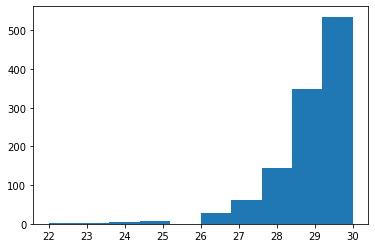

In [45]:
x = MRI.loc[MRI['Group']=='ND', 'MMSE'].dropna()
plt.hist(x,bins=10)
plt.show()

In [ ]:
print(MRI[(MRI['MMSE']<=25)&(MRI['Group']=='ND')])
print(len(MRI[(MRI['Age']>=90)&(MRI['Group']=='ND')]))
print(len(MRI[MRI['Age']>=90]))

A score between 22-25 is not abnormally low. Additionally, one of the subjects that obtained an MMSE score of 25 is 90 years old, it is plausible for a 90 year old without dementia to score slightly lower due to normal effects of aging, additionally, there are 38 other 90 year old subjects within this sample. I will keep this subject and others who scored below 25 in the dataset in order to represent the true population of adults ages 50-100

Subject 0131 is the subject from converted group 4, they will be kept in the dataset

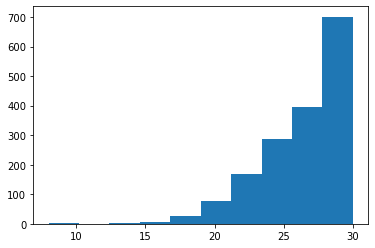

In [47]:
histMCI = MRI.loc[MRI['Group']=='MCI', 'MMSE']
plt.hist(histMCI,bins=10)
plt.show()

In [48]:
print(len(MRI[(MRI['MMSE']<=15)&(MRI['Group']=='MCI')]))

8


There are 8 subjects within the lower range of MMSE scores, removing these subjects will not affect the skew of the data, also, extreme values of brain volume data have been removed, therefore these subjects will remain in the dataset

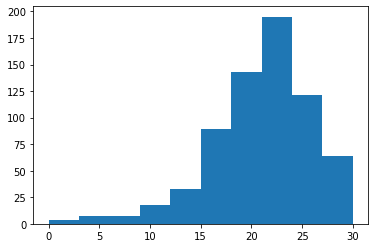

In [49]:
histAD = MRI.loc[MRI['Group']=='AD', 'MMSE']
plt.hist(histAD,bins=10)
plt.show()

In [ ]:
#print(MRI[(MRI['MMSE']==14)&(MRI['Group']=='MCI')])
print(MRI[(MRI['MMSE']<10)&(MRI['Group']=='AD')])
print(MRI[MRI['Subject_ID']=='OAS2_0048'])

Within the AD sample, subject 0048 was the only subject who scored lower than 15 in the MMSE. 
They were given the same CDR of 1 at every scan, however, their MMSE scores significantly declined during this period. They remained in their late 60's throughout this time, their eTIV and nWBV scores also remained in the same range.

It is possible that there was a data entry error and MMSE were supposed to be 17 and 14, however, it would be innaporopriate to change these values as the MMSE is a clinical examination. Therefore I will remove these rows

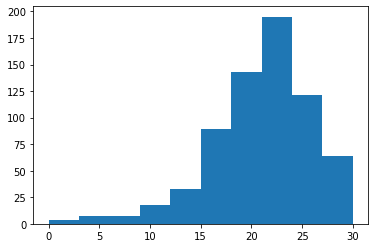

In [51]:
#MRI.drop(100,inplace=True)
#MRI.drop(101,inplace=True)
histAD = MRI.loc[MRI['Group']=='AD', 'MMSE']
plt.hist(histAD,bins=10)
plt.show()

# Results

## 3.1 Overview of data

### 3.1.1 Aggregate analysis of data after cleaning

In [223]:
# counts the amount of unique subject ID's/amount of subjects in the whole dataset
print(MRI.groupby(['Subject_ID']).Subject_ID.unique().count())

1159


In [228]:
# prints the amount of subjects for each number of MRI scans
# due to the nature of the non-unique subject id's this was done manually
for i in range(1,13):
    if i == 1:
        print(i, " ", len(MRI.loc[MRI['num_MRI']==i, 'Subject_ID']))
    else:
        print(i, " ", len(MRI.loc[MRI['num_MRI']==i, 'Subject_ID'].unique()))

print("\n")


1   288
2   184
3   236
4   179
5   176
6   57
7   14
8   16
9   6
10   3
11   0
12   0




In [229]:
#prints the amount of subjects that converted and did not convert
for i in range(1,6):
    print(i, " ", len(MRI.loc[MRI['counts']==i, 'Subject_ID'].unique()))        

print("\n")

1   886
2   266
3   6
4   1
5   0




In [231]:
# prints the amount of subjects in each conversion group
for i in range(7):
    print(i, " ", len(MRI.loc[MRI['Converted']==i, 'Subject_ID'].unique()))

0   948
1   38
2   1
3   123
4   16
5   8
6   0


In [232]:
# counts the amount of subjects in each diagnosis group on the first and last scan
thisgroup = MRI.groupby(['Subject_ID']).Group.first()

diagnosis = {'AD':0,'ND':0,'U':0,'MCI':0}
for i in range(len(thisgroup)):
    for key in diagnosis.keys():
        if thisgroup.iloc[i] == key:
            diagnosis[key] += 1
print(diagnosis['AD'])
print(diagnosis['ND'])
print(diagnosis['U'])
print(diagnosis['MCI'])
print("\n")

thisgroup_last = MRI.groupby(['Subject_ID']).Group.last()

diagnosis_last = {'AD':0,'ND':0,'U':0,'MCI':0}
for i in range(len(thisgroup_last)):
    for key in diagnosis_last.keys():
        if thisgroup_last.iloc[i] == key:
            diagnosis_last[key] += 1
print(diagnosis_last['AD'])
print(diagnosis_last['ND'])
print(diagnosis_last['U'])
print(diagnosis_last['MCI'])

176
427
20
536


291
398
33
437


### Analysis of Converted subjects

In [234]:
# saves the amount of subjects in each group to dictionary values
convertedgroupby = MRI.groupby(['Subject_ID']).Converted.first()
converted = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
for i in range(len(convertedgroupby)):
    for key in converted.keys():
        if convertedgroupby.iloc[i] == key:
            converted[key] += 1
            

# prints the percentage of subjects in each group
print(round((converted[0] / 1159 * 100),1),"%")
print(round(converted[1] / 1159 * 100,1),"%")
print(round(converted[2] / 1159 * 100,1),"%")
print(round(converted[3] / 1159 * 100,1),"%")
print(round(converted[4] / 1159 * 100,1),"%")
print(round(converted[5] / 1159 * 100,1),"%")
print(round(converted[6] / 1159 * 100,1),"%")

81.8 %
3.3 %
0.1 %
10.6 %
1.4 %
0.7 %
0.0 %


In [235]:
# groups subjects on days between scans
dgl = MRI.groupby(['Subject_ID','Converted','num_MRI','Group']).MR_Delay.last()

In [55]:
# amount of subjects who had their final scan within 6 months
print(len(dgl[(dgl<183)&(dgl>0)]))

# amount of rows with scans after 6 months
print(len(MRI.loc[(MRI['MR_Delay']<183)&(MRI['MR_Delay']>0)]))

#6-12 months
print(len(dgl[(dgl<366)&(dgl>182)]))
print(len(MRI.loc[(MRI['MR_Delay']<366)&(MRI['MR_Delay']>182)]))

62
337
123
471


In [236]:
# 12-18 months
print(len(dgl[(dgl<548)&(dgl>365)]))
print(len(MRI.loc[(MRI['MR_Delay']<548)&(MRI['MR_Delay']>365)]))


# 18-24 months
print(len(dgl[(dgl<731)&(dgl>547)]))
print(len(MRI.loc[(MRI['MR_Delay']<731)&(MRI['MR_Delay']>547)]))


182
458
187
366


In [237]:
# 24-30 months 
print(len(dgl[(dgl<913)&(dgl>730)]))
print(len(MRI.loc[(MRI['MR_Delay']<913)&(MRI['MR_Delay']>730)]))

# 30-36 months 
print(len(dgl[(dgl<1096)&(dgl>912)]))
print(len(MRI.loc[(MRI['MR_Delay']<1096)&(MRI['MR_Delay']>912)]))

143
225
139
210


In [58]:
# 36-42 months 
print(len(dgl[(dgl<1278)&(dgl>1095)]))

# 42-48 months
print(len(dgl[(dgl<1461)&(dgl>1277)]))

42
68


In [59]:
#48-54 months
print(len(dgl[(dgl<1643)&(dgl>1460)]))

#54-60 months
print(len(dgl[(dgl<1826)&(dgl>1642)]))

12
9


In [60]:
# 60-66 months 
print(len(dgl[(dgl<2008)&(dgl>1825)]))

# 66-72 months
print(len(dgl[(dgl<2191)&(dgl>2007)]))

5
2


In [61]:
# 72-78 months
print(len(dgl[(dgl<2373)&(dgl>2190)]))

# 78-84 months
print(len(dgl[(dgl<2556)&(dgl>2372)]))

2
4


In [62]:
# 84-90 months 
print(len(dgl[(dgl<2738)&(dgl>2555)]))


1


In [63]:
# this is the longest time interval
print(dgl[(dgl>2556)])

Subject_ID  Converted  num_MRI  Group
OAS2_0127   1.0        5        MCI     2639.000
Name: MR_Delay, dtype: object


In [ ]:
# explore data for the undiagnosed subjects
print(MRI[MRI['Group']=='U'])
heyy = MRI[MRI['Group']=='U']
heyy.describe()

# MMSE

In [67]:
MMSE = MRI.groupby(['Subject_ID'])
MMSE_last = MRI.groupby(['Subject_ID']).MMSE.last()
print(MMSE['MMSE'].first().describe())
print(MMSE_last.describe())

count   1141.000
mean      26.433
std        3.718
min        0.000
25%       24.000
50%       28.000
75%       29.000
max       30.000
Name: MMSE, dtype: float64
count   1141.000
mean      25.491
std        5.016
min        0.000
25%       23.000
50%       27.000
75%       29.000
max       30.000
Name: MMSE, dtype: float64


# eTIV, nWBV and ASF

In [68]:
def describe(column):
    HELLO = MRI.groupby(['Subject_ID'])
    print(HELLO[column].first().describe())
    print(HELLO[column].last().describe())

describe('eTIV')

count    380.000
mean    1466.558
std      164.706
min     1123.000
25%     1350.750
50%     1447.000
75%     1556.000
max     1992.000
Name: eTIV, dtype: float64
count    380.000
mean    1470.789
std      167.038
min     1106.000
25%     1351.000
50%     1453.500
75%     1561.250
max     2004.000
Name: eTIV, dtype: float64


In [69]:
describe('nWBV')



count   380.000
mean      0.743
std       0.044
min       0.644
25%       0.710
50%       0.741
75%       0.772
max       0.846
Name: nWBV, dtype: float64
count   380.000
mean      0.738
std       0.046
min       0.644
25%       0.702
50%       0.736
75%       0.770
max       0.846
Name: nWBV, dtype: float64


In [70]:
#describe('EICV')
HELLO = MRI.groupby(['Subject_ID'])
print(HELLO['EICV'].first().describe().apply(lambda x: format(x, '.2f')))
print(HELLO['EICV'].last().describe().apply(lambda x: format(x, '.2f')))

count        509.00
mean     1464602.85
std       153809.90
min      1059560.00
25%      1347330.00
50%      1460030.00
75%      1564790.00
max      1951440.00
Name: EICV, dtype: object
count        509.00
mean     1464602.85
std       153809.90
min      1059560.00
25%      1347330.00
50%      1460030.00
75%      1564790.00
max      1951440.00
Name: EICV, dtype: object


In [71]:
describe('BRAINVOL')

count    540.000
mean    1027.342
std      116.323
min      701.968
25%      941.938
50%     1027.854
75%     1106.414
max     1376.792
Name: BRAINVOL, dtype: float64
count    540.000
mean    1018.571
std      115.047
min      688.885
25%      932.360
50%     1016.740
75%     1098.942
max     1400.311
Name: BRAINVOL, dtype: float64


# Preparation for further analysis

For this exploratory data analysis I will be using statistical tests to determine whether there is a difference between groups or whether certain independent variables predict a dependent variable

My main interest is the brain volume data of patients with an MCI diagnosis, so I will be using this data for most of the analysis'

In order to analyse the brain volume of subjects with MCI on different time intervals I will need more data, so this analysis will not be included in this EDA

I will be analysing the following interactions:
MMSE, eTIV and nWBV scores of subjects with MCI from converted group 0 and 3

The reliability of these analysis' will be questionable due to small sample sizes (13), nonetheless, in future analysis I will obtain a larger dataset 

# Description of variables

#### MMSE - discrete or continuous ordinal variable
Although the MMSE is a quantitative clinical assesment, the reliability and validity are not 100%. Additionally, it is a test of cognitive function with variables such as memory and attention. Therefore, I will assume that there is no meaningful interval between scores and MMSE is an ordinal variable, namely, the difference between a score of 15 and 20 may not be the same as the difference between a score of 5 and 10.

Although subjects cannot be given half scores, mean MMSE scores can be interpreted by rounding therefore MMSE can be represented as either a continous or discrete variable

#### eTIV & nWBV - continous ratio variable
as eTIV and nWBV values can be any real numbers between two real numbers they are continuous variables

There is a meaningful interval between brain volume measurments and a value of 0 represents the absence of brain volume, therefore eTIV & nWBV will be represented as ratio variables


#### MR_Delay - discrete ratio variable
Although days can be split into hours and minutes, whole days are being used in this analysis, therefore MR_Delay will be represented as a discrete variable

There is a meaningful interval between days and 0 days represents the absence of a full day, therefore MR_Delay will be represented as a ratio variable

#### CDR - discrete ordinal

#### Converted - categorical discrete

## Normality tests

I will be checking the normality of various distributions in order to choose the appropriate method for further analysis.

I will begin by using a histogram, if the data is not heavily skewed or obviously normal I will use a Shapiro-Wilk test to determine the distribiton of the data.

### MMSE



From the histogram previously formed for the MMSE scores of subjects with no dementia it is clear that this sample is heavily, negatively skewed. The MMSE scores of subjects with MCI are also heavily skewed, with a wider range.

From looking at the histogram, the distribution of MMSE scores for individuals with AD is not as clear, therefore I will use a Shapiro-Wilk test

In [72]:
# remove na values from sample
shapirodata = np.array(MRI.loc[MRI['Group']=='AD', 'MMSE'])
shapirodatanonan = shapirodata[np.logical_not(np.isnan(shapirodata))]

shapiro_test = stats.shapiro(shapirodatanonan)
print(shapiro_test)
print(format(shapiro_test.pvalue, '.2f'))

ShapiroResult(statistic=0.9437198042869568, pvalue=2.1326648485527977e-15)
0.00


The Shapiro-Wilk test showed that the distribution of MMSE scores for subjects with AD departed significantly from normality (W=0.94, p-value<0.01). Although, from the histogram it does not look as heavily skewed as the ND and MCI distribution.

Nonetheless, based on this outcome, a non-parametric test will be used for this distribution.

### eTIV & nWBV

As brain volume data is continous, ANOVA will not be an appropriate statistical analysis, therefore I will use regression analysis which does not require the assumption of normality

eTIV and nWBV are both data pertaining to brain volume, therefore, they must be correlated with eachother. If they are not correlated this would suggest that the variability in intracranial volume of those with different diagnosis' is not associated with variability in whole brain volume. This will inform the features I choose for further analysis as I will want to choose the brain volume feature that is the best predictor of diagnosis

In [153]:
print(MRI.head())

  Subject_ID         MRI_ID Group  Visit MR_Delay    Age   MMSE   CDR  \
0  OAS2_0001  OAS2_0001_MR1    ND  1.000    0.000 87.000 27.000 0.000   
1  OAS2_0001  OAS2_0001_MR2    ND  2.000  457.000 88.000 30.000 0.000   
2  OAS2_0002  OAS2_0002_MR1   MCI  1.000    0.000 75.000 23.000 0.500   
3  OAS2_0002  OAS2_0002_MR2   MCI  2.000  560.000 76.000 28.000 0.500   
4  OAS2_0002  OAS2_0002_MR3   MCI  3.000 1895.000 80.000 22.000 0.500   

      eTIV  nWBV   ASF  EICV  BRAINVOL  counts Converted  num_MRI  
0 1987.000 0.696 0.883   NaN       NaN       1     0.000        2  
1 2004.000 0.681 0.876   NaN       NaN       1     0.000        2  
2 1678.000 0.736 1.046   NaN       NaN       1     0.000        3  
3 1738.000 0.713 1.010   NaN       NaN       1     0.000        3  
4 1698.000 0.701 1.034   NaN       NaN       1     0.000        3  


# Correlation matrix for eTIV & nWBV on conversion groups

In [172]:
# creates a random sample of 13 rows of the eTIV, nWBV, CDR and Converted columns for different groups
#ND0IV = shuffle(MRI.loc[(MRI['CDR']==0)&(MRI['Converted']==0)])
#ND0IV = np.array(ND0IV.iloc[0:13,[12,11,16,10]])

#ND0BV = shuffle(MRI.loc[(MRI['CDR']==0)&(MRI['Converted']==0)])
#ND0BV = np.array(ND0BV.iloc[0:13,13])

#AD0IV = shuffle(MRI.loc[(MRI['CDR']==1)&(MRI['Converted']==0)])
#AD0IV = np.array(AD0IV.iloc[0:13,[12,11,16,10]])

#AD0BV = shuffle(MRI.loc[(MRI['CDR']==1)&(MRI['Converted']==0)])
#AD0BV = np.array(AD0BV.iloc[0:13,13])

#df[~df['Age'].isnull()]

MCI0 = shuffle(MRI.loc[(MRI['CDR']==0.5)&(MRI['Converted']==0)])
#MCI0IV = np.array(MRI[~MRI[['eTIV','MMSE','EICV']].isnull()])
MCI0 = np.array(MCI0.iloc[0:1256,[8,6,11,4,9,12]])

print("IV0")
IV0_1 = MCI0[:,0]
IV0_1 = IV0_1[~pd.isnull(IV0_1)]
print(len(IV0_1))

IV0_2 = MCI0[:,2]
IV0_2 = IV0_2[~pd.isnull(IV0_2)]
print(len(IV0_2))

MMSE0 = MCI0[:,1]
MMSE0 = MMSE0[~pd.isnull(MMSE0)]
print(len(MMSE0))

#MCI0BV = shuffle(MRI.loc[(MRI['CDR']==0.5)&(MRI['Converted']==0)&(MRI['MR_Delay']<1278)])
#MCI0BV = np.array(MCI0BV.iloc[0:293,[9,12]])
print("BV0")
BV0_1 = MCI0[:,4]
BV0_1 = BV0_1[~pd.isnull(BV0_1)]
print(len(BV0_1))

BV0_2 = MCI0[:,5]
BV0_2 = BV0_2[~pd.isnull(BV0_2)]
print(len(BV0_2))

MCI3 = MRI.loc[(MRI['CDR']==0.5)&(MRI['Converted']==3)&(MRI['MR_Delay']<1278)]
MCI3 = np.array(MCI3[['eTIV','MMSE','EICV','MR_Delay','nWBV','BRAINVOL']])
print("IV3")
IV3_1 = MCI3[:,0]
IV3_1 = IV3_1[~pd.isnull(IV3_1)]
print(len(IV3_1))

IV3_2 = MCI3[:,2]
IV3_2 = IV3_2[~pd.isnull(IV3_2)]
print(len(IV3_2))

MMSE3 = MCI3[:,1]
MMSE3 = MMSE3[~pd.isnull(MMSE3)]
print(len(MMSE3))

#MCI3BV = MRI.loc[(MRI['CDR']==0.5)&(MRI['Converted']==3)]
#MCI3BV = np.array(MCI3BV[['nWBV','BRAINVOL']])
print("BV3")
BV3_1 = MCI3[:,4]
BV3_1 = BV3_1[~pd.isnull(BV3_1)]
print(len(BV3_1))

BV3_2 = MCI3[:,5]
BV3_2 = BV3_2[~pd.isnull(BV3_2)]
print(len(BV3_2))


# prepares columns for new dataframe
#BV = np.concatenate((MCI0BV[:,0],MCI3BV[:,0]),axis=None)
#BV2 = np.concatenate((MCI0BV[:,1],MCI3BV[:,1]),axis=None)
#IV = np.concatenate((MCI0IV[:,0],MCI3IV[:,0]),axis=None)
#IV2 = np.concatenate((MCI0IV[:,3],MCI3IV[:,3]),axis=None)
#MMSE = np.concatenate((MCI0IV[:,2],MCI3IV[:,2]),axis=None)
#CONVERTED = np.concatenate((MCI0IV[:,1],MCI3IV[:,1]),axis=None)

IV0
158
501
1220
BV0
158
578
IV3
13
157
290
BV3
13
173


# Average rate of atrophy of conversion groups

The difference between subjects in these groups may not be their current brain volume, as they have all been diagnosed with MCI, the difference may be in the rate of atrophy of brain volume. It is normal for the brain to atrophy with age (reference), however, subjects with progressive MCI may exhibit a faster rate of atrophying. Thus, the rate of atrophy of subject in each conversion group will be computed  

In [203]:
MR_DELAY0 = MCI0[:,3]
MR_DELAY3 = MCI3[:,3]
BV0 = MCI0[:,5]
BV3 = MCI3[:,5]
IV0 = MCI0[:,2]
IV3 = MCI3[:,2]
maxlen = len(IV3)

rdBV = np.concatenate((BV0[0:maxlen],BV3[0:maxlen]),axis=None)
rdIV = np.concatenate((IV0[0:maxlen],IV3[0:maxlen]),axis=None)
rdDELAY = np.concatenate((MR_DELAY0[0:maxlen],MR_DELAY3[0:maxlen]),axis=None)
rdCONVERTED = np.concatenate((np.zeros(maxlen),np.ones(maxlen)),axis=None)

rate_decay_df = [rdBV,rdIV,rdDELAY,rdCONVERTED]
rate_decay_df = pd.DataFrame(rate_decay_df).T
rate_decay_df.rename(columns={0:'BRAINVOL',1:'EICV',2:'MR_DELAY',3:'Converted'},inplace=True)
#print(rate_decay_df)

rate_decay_df = rate_decay_df.dropna()
#print(rate_decay_df)

BV0_start = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']==0)&(rate_decay_df['Converted']==0)]['BRAINVOL'])
BV0_1yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<547)&(rate_decay_df['MR_DELAY']>364)&(rate_decay_df['Converted']==0)]['BRAINVOL'])
BV0_2yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<912)&(rate_decay_df['MR_DELAY']>729)&(rate_decay_df['Converted']==0)]['BRAINVOL'])
BV0_3yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<1277)&(rate_decay_df['MR_DELAY']>1095)&(rate_decay_df['Converted']==0)]['BRAINVOL'])

IV0_start = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']==0)&(rate_decay_df['Converted']==0)]['EICV'])
IV0_1yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<547)&(rate_decay_df['MR_DELAY']>364)&(rate_decay_df['Converted']==0)]['EICV'])
IV0_2yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<912)&(rate_decay_df['MR_DELAY']>729)&(rate_decay_df['Converted']==0)]['EICV'])
IV0_3yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<1277)&(rate_decay_df['MR_DELAY']>1095)&(rate_decay_df['Converted']==0)]['EICV'])

BV3_start = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']==0)&(rate_decay_df['Converted']==1)]['BRAINVOL'])
BV3_1yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<547)&(rate_decay_df['MR_DELAY']>364)&(rate_decay_df['Converted']==1)]['BRAINVOL'])
BV3_2yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<912)&(rate_decay_df['MR_DELAY']>729)&(rate_decay_df['Converted']==1)]['BRAINVOL'])
BV3_3yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<1277)&(rate_decay_df['MR_DELAY']>1095)&(rate_decay_df['Converted']==1)]['BRAINVOL'])

IV3_start = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']==0)&(rate_decay_df['Converted']==1)]['EICV'])
IV3_1yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<547)&(rate_decay_df['MR_DELAY']>364)&(rate_decay_df['Converted']==1)]['EICV'])
IV3_2yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<912)&(rate_decay_df['MR_DELAY']>729)&(rate_decay_df['Converted']==1)]['EICV'])
IV3_3yr = np.array(rate_decay_df[(rate_decay_df['MR_DELAY']<1277)&(rate_decay_df['MR_DELAY']>1095)&(rate_decay_df['Converted']==1)]['EICV'])

variables = [BV0_start, BV0_1yr, BV0_2yr, BV0_3yr,IV0_start, IV0_1yr, IV0_2yr, IV0_3yr, BV3_start, BV3_1yr, BV3_2yr, BV3_3yr, IV3_start, IV3_1yr, IV3_2yr, IV3_3yr]

for i in range(16):
    print(len(variables[i]))



31
29
2
0
31
29
2
0
65
27
1
0
65
27
1
0


# Average rate of atrophy in 1 year

In [209]:
#BRAIN VOLUME 0
RA_BV0 = (BV0_1yr[0:29]-BV0_start[0:29])/BV0_start[0:29]
print(np.mean(RA_BV0))

#BRAIN VOLUME 3
RA_BV3 = (BV3_1yr[0:27]-BV3_start[0:27])/BV3_start[0:27]
print(np.mean(RA_BV3))

#INTRACRANIAL VOLUME 0
RA_IV0 = (IV0_1yr[0:29]-IV0_start[0:29])/IV0_start[0:29]
print(np.mean(RA_IV0))

#INTRACRANIAL VOLUME 3
RA_IV3 = (IV3_1yr[0:27]-IV3_start[0:27])/IV3_start[0:27]
print(np.mean(RA_IV3))


0.02947941545182213
0.0349566676351759
0.04276728899757745
0.04685326889199114


In [80]:
O_IV = np.concatenate((IV0_1[0:13],IV3_1[0:13]),axis=None)
O_BV = np.concatenate((BV0_1[0:13],BV3_1[0:13]),axis=None)
O_MMSE = np.concatenate((MMSE0[0:13],MMSE3[0:13]),axis=None)
O_CONVERTED = np.concatenate((np.zeros(13),np.ones(13)),axis=None)
O_df = [O_BV,O_IV,O_MMSE,O_CONVERTED]
O_df = pd.DataFrame(O_df).T
O_df.rename(columns={0:'nWBV',1:'eTIV',2:'MMSE',3:'Converted'},inplace=True)
print(O_df)

    nWBV     eTIV   MMSE  Converted
0  0.709 1482.000 23.000      0.000
1  0.773 1738.000 29.000      0.000
2  0.686 1556.000 29.000      0.000
3  0.653 1548.000 19.000      0.000
4  0.691 1179.000 19.000      0.000
5  0.698 1899.000 29.000      0.000
6  0.732 1399.000 25.000      0.000
7  0.753 1174.000 26.000      0.000
8  0.695 1668.000 20.000      0.000
9  0.736 1774.000 28.000      0.000
10 0.716 1701.000 28.000      0.000
11 0.713 1495.000 24.000      0.000
12 0.742 1447.000 29.000      0.000
13 0.748 1357.000 28.000      1.000
14 0.697 1602.000 21.000      1.000
15 0.737 1547.000 22.000      1.000
16 0.750 1476.000 20.000      1.000
17 0.724 1461.000 20.000      1.000
18 0.759 1447.000 23.000      1.000
19 0.692 1432.000 29.000      1.000
20 0.696 1568.000 25.000      1.000
21 0.727 1316.000 27.000      1.000
22 0.720 1343.000 30.000      1.000
23 0.705 1557.000 27.000      1.000
24 0.733 1171.000 26.000      1.000
25 0.733 1354.000 24.000      1.000


In [78]:
max_length = len(BV0_2)
ADNI_IV = np.concatenate((IV0_2[0:max_length],IV3_2[0:max_length]),axis=None)
ADNI_BV = np.concatenate((BV0_2[0:max_length],BV3_2[0:max_length]),axis=None)
ADNI_MMSE = np.concatenate((MMSE0[0:max_length],MMSE3[0:max_length]),axis=None)
ADNI_CONVERTED = np.concatenate((np.zeros(max_length),np.ones(max_length)),axis=None)
ADNI_df = [ADNI_BV,ADNI_IV,ADNI_MMSE,ADNI_CONVERTED]
ADNI_df = pd.DataFrame(ADNI_df).T
ADNI_df.rename(columns={0:'BRAINVOL',1:'EICV',2:'MMSE',3:'Converted'},inplace=True)


     BRAINVOL        EICV   MMSE  Converted
0     992.905 1279750.000 23.000      0.000
1    1049.568 1583500.000 29.000      0.000
2     943.936 1254250.000 29.000      0.000
3    1235.725 1337000.000 19.000      0.000
4    1216.695 1720290.000 19.000      0.000
..        ...         ...    ...        ...
293  1054.036 1165730.000 25.000      1.000
294  1172.099 1383950.000 26.000      1.000
295  1064.066 1383950.000 21.000      1.000
296   917.660 1534770.000 22.000      1.000
297   943.896 1534770.000 15.000      1.000

[298 rows x 4 columns]


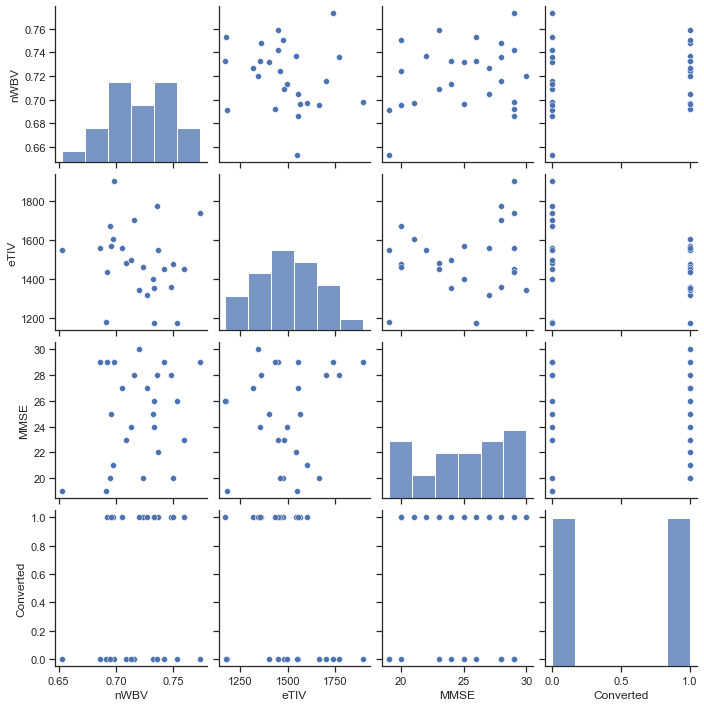

In [81]:
sns.set_theme(style="ticks")
sns.pairplot(O_df)

In [82]:
O_corr = O_df.corr()
print(O_corr)

            nWBV   eTIV   MMSE  Converted
nWBV       1.000 -0.178  0.254      0.178
eTIV      -0.178  1.000  0.150     -0.309
MMSE       0.254  0.150  1.000     -0.065
Converted  0.178 -0.309 -0.065      1.000


From the scatterplot of the brain volume and MMSE data there appears to be no linear correlation between these variables. The lack of linear correlation could also be due to the small sample size.

Additionally, the correlation matrix shows that there are no strong correlations between the independent variables. Although, there is a very moderate negative correlation between Converted group and nWBV (-0.46)

The scatterplot for the nWBV on Converted illustrates this moderate correlation as there are lower nWBV values in Converted group 3 compared to the nWBV values in Converted group 0

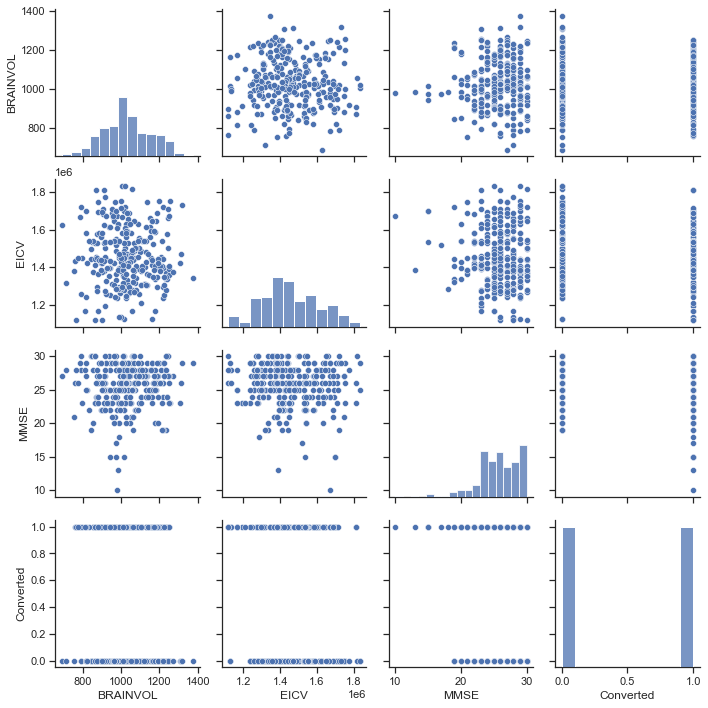

In [84]:
sns.set_theme(style="ticks")
sns.pairplot(ADNI_df)

In [86]:
ADNI_corr = ADNI_df.corr()
print(ADNI_corr)

           BRAINVOL   EICV   MMSE  Converted
BRAINVOL      1.000 -0.041  0.051     -0.064
EICV         -0.041  1.000 -0.079     -0.037
MMSE          0.051 -0.079  1.000     -0.283
Converted    -0.064 -0.037 -0.283      1.000


# NO CORRELATIONS

# Further analysis

## Kruskal-Wallis H test on MMSE scores


In [87]:
# MMSE scores for subjects in Converted groups 0 and 3
MMSE0 = MMSE0[0:290]
MMSE3 = MMSE3[0:290]
kruskal_test = stats.kruskal(MMSE0,MMSE3)
print(kruskal_test)
print(format(kruskal_test.pvalue, '.2f'))

KruskalResult(statistic=60.031899418954495, pvalue=9.333238792592271e-15)
0.00


Kruskal-Wallis Test was conducted to examine the differences on MMSE scores accoridng to the conversion group. A significant difference (H=65.88, p<0.01) was found among the 2 samples (group 3, conversion from MCI to AD and group 0, no conversion). A post-hoc test will not be necessary as there are 2 variables, so we know that there is a significant difference between the two variables presented. MMSE will be used in a regression analysis.

In [210]:
kruskal_test2 = stats.kruskal(RA_BV0,RA_BV3)
print(kruskal_test2)
print(format(kruskal_test2.pvalue, '.2f'))

KruskalResult(statistic=0.015124016938898421, pvalue=0.9021231397359233)
0.90


In [211]:
kruskal_test3 = stats.kruskal(RA_IV0,RA_IV3)
print(kruskal_test3)
print(format(kruskal_test3.pvalue, '.2f'))

KruskalResult(statistic=0.042012594000690684, pvalue=0.8375957676529782)
0.84


# Regression on conversion group and brain volume data

Logistic regression will be used to find a relationship between brain volume data of subjects with MCI and conversion group. This method will be used due to the dichotomous nature of the dependent variaible, conversion group.

Conversion group number 3 will be changed to 1, so those with MCI who later converted to AD will be in group 1 and those with MCI who did not convert will be in group 0

eTIV and nWBV will be used as independent variables/predictors with conversion group used as a dependent variable. 

Hierarchal logistic regression will then be used to determine the effect of eTIV on the model, as the correlation analysis showed that nWBV is the only variable with a moderate linear correlation to conversino group. 

Although a machine learning model will ultimatley be used for this data, the results of this regression will be used as a benchmark. If a machine learning model cannot outperform the regression model there is truly no relationship in this data.

# BRAINVOL and conversion group

In [91]:
Y1 = ADNI_CONVERTED
X1 = ADNI_BV.reshape(-1,1)

In [111]:
logr1 = linear_model.LogisticRegression(solver='liblinear', random_state=0).fit(X1,Y1)

In [112]:
# prints a matrix of probabilities. Each row corresponds to a unique nWBV value, the columns correspond to the 
# probability that the value belongs to group 0 or 1 respectively
print(logr1.predict_proba(X1)[0:20])

[[0.49685114 0.50314886]
 [0.50450101 0.49549899]
 [0.49024106 0.50975894]
 [0.52959942 0.47040058]
 [0.52703844 0.47296156]
 [0.49388039 0.50611961]
 [0.48682997 0.51317003]
 [0.49825723 0.50174277]
 [0.52177476 0.47822524]
 [0.46964494 0.53035506]
 [0.52893435 0.47106565]
 [0.47969205 0.52030795]
 [0.48717941 0.51282059]
 [0.47668884 0.52331116]
 [0.46958588 0.53041412]
 [0.48888872 0.51111128]
 [0.48495443 0.51504557]
 [0.53221289 0.46778711]
 [0.49721349 0.50278651]
 [0.49849362 0.50150638]]


In [113]:
# number of observation divided by correct predictions
logr1.score(X1,Y1)

0.540268456375839

# EICV and conversion group

In [114]:

X2 = ADNI_IV.reshape(-1,1)

In [115]:
logr2 = linear_model.LogisticRegression(solver='liblinear', random_state=0).fit(X2,Y1)

In [116]:
print(logr2.predict_proba(X2)[0:20])

[[0.50167725 0.49832275]
 [0.50207534 0.49792466]
 [0.50164383 0.49835617]
 [0.50175228 0.49824772]
 [0.50225461 0.49774539]
 [0.50178942 0.49821058]
 [0.50165131 0.49834869]
 [0.50180816 0.49819184]
 [0.50175228 0.49824772]
 [0.50165131 0.49834869]
 [0.50182802 0.49817198]
 [0.50191003 0.49808997]
 [0.50189462 0.49810538]
 [0.50189483 0.49810517]
 [0.50225461 0.49774539]
 [0.50211603 0.49788397]
 [0.50221051 0.49778949]
 [0.50230004 0.49769996]
 [0.50165221 0.49834779]
 [0.502404   0.497596  ]]


In [117]:
logr2.score(X2,Y1)

0.5

In [118]:

X3 = ADNI_MMSE.reshape(-1,1)

In [119]:
logr3 = linear_model.LogisticRegression(solver='liblinear', random_state=0).fit(X3,Y1)

In [120]:
print(logr3.predict_proba(X3)[0:20])

[[0.44411307 0.55588693]
 [0.58947789 0.41052211]
 [0.58947789 0.41052211]
 [0.35084025 0.64915975]
 [0.35084025 0.64915975]
 [0.58947789 0.41052211]
 [0.49273684 0.50726316]
 [0.51715847 0.48284153]
 [0.37340605 0.62659395]
 [0.5656419  0.4343581 ]
 [0.5656419  0.4343581 ]
 [0.46834982 0.53165018]
 [0.58947789 0.41052211]
 [0.35084025 0.64915975]
 [0.612901   0.387099  ]
 [0.49273684 0.50726316]
 [0.42013938 0.57986062]
 [0.44411307 0.55588693]
 [0.51715847 0.48284153]
 [0.49273684 0.50726316]]


In [121]:
logr3.score(X3,Y1)

0.6342281879194631

In [132]:
test = np.concatenate((MMSE0[max_length:(max_length+50)],MMSE3[max_length:(max_length+50)])).reshape(-1,1)
testlabels = np.concatenate((np.zeros(50),np.ones(50)))
logr3.predict(test)
logr3.score(test,testlabels)

0.68

# nWBV and conversion group

In [134]:
Y2 = O_CONVERTED
X4 = O_BV.reshape(-1,1)


In [135]:
logr4 = linear_model.LogisticRegression(solver='liblinear', random_state=0).fit(X4,Y2)

In [139]:
# prints a matrix of probabilities. Each row corresponds to a unique nWBV value, the columns correspond to the 
# probability that the value belongs to group 0 or 1 respectively
print(logr4.predict_proba(X4))


[[0.49909306 0.50090694]
 [0.49841073 0.50158927]
 [0.49933828 0.50066172]
 [0.49969011 0.50030989]
 [0.49928497 0.50071503]
 [0.49921034 0.50078966]
 [0.49884785 0.50115215]
 [0.49862396 0.50137604]
 [0.49924232 0.50075768]
 [0.4988052  0.5011948 ]
 [0.49901843 0.50098157]
 [0.49905042 0.50094958]
 [0.49874123 0.50125877]
 [0.49867726 0.50132274]
 [0.499221   0.500779  ]
 [0.49879454 0.50120546]
 [0.49865594 0.50134406]
 [0.49893314 0.50106686]
 [0.49855999 0.50144001]
 [0.49927431 0.50072569]
 [0.49923166 0.50076834]
 [0.49890116 0.50109884]
 [0.49897579 0.50102421]
 [0.49913571 0.50086429]
 [0.49883719 0.50116281]
 [0.49883719 0.50116281]]


In [140]:
# number of observation divided by correct predictions
logr4.score(X4,Y2)

0.5

As there are two classes or dependent values there is a 50/50 chance that the prediction will be correct, therefore this model did not find a relationship between nWBV and conversion group.

# eTIV and conversion group

In [141]:
X5=O_IV.reshape(-1,1)

In [142]:
logr5 = linear_model.LogisticRegression(solver='liblinear', random_state=0).fit(X5,Y2)

In [143]:
print(logr5.predict_proba(X5))

[[0.51618466 0.48381534]
 [0.53764689 0.46235311]
 [0.52239824 0.47760176]
 [0.5217268  0.4782732 ]
 [0.49071103 0.50928897]
 [0.55107853 0.44892147]
 [0.50920951 0.49079049]
 [0.49029072 0.50970928]
 [0.53178879 0.46821121]
 [0.54065569 0.45934431]
 [0.53455166 0.46544834]
 [0.51727665 0.48272335]
 [0.51324394 0.48675606]
 [0.50567838 0.49432162]
 [0.52625737 0.47374263]
 [0.52164287 0.47835713]
 [0.51568061 0.48431939]
 [0.51442035 0.48557965]
 [0.51324394 0.48675606]
 [0.51198334 0.48801666]
 [0.52340525 0.47659475]
 [0.50223077 0.49776923]
 [0.50450119 0.49549881]
 [0.52248217 0.47751783]
 [0.49003853 0.50996147]
 [0.50542613 0.49457387]]


In [144]:
logr2.score(X2,Y)

0.5

# Discussion

The aim of this project was to explore variables related to the conversion from MCI to alzheimer's. A data pipeline has been formed which will aid in the development of a algorithms that find patterns in neuroimaging data.  

There seems to be no linear relationship between subjects with MCI who converted to AD and those who didn't. Although this may be due to the small sample size, these results provide grounds for analysis using a more powerful machine learning method that may capture the complex relationship between alzheimer's disease and brain volume.  

The Kruskal-Wallis test did not find a significant difference in rate of atrophy in the first year, between conversion group 0 and 3. However sample size was small and data was only analysed from first year between scans where the least difference would be observed. More data is needed and also a more sophisticated method of analysing rate of atrophy can be conducted.

The scale used for diagnosis may have caused some limitations in this study, as I used a global CDR rating to classify subjects. Neurodegenerative diseases are complex conditons that vary from individual to indidviual, thus, it is possible that there were variations in the cognitive function of subjects classified as MCI or AD, which may have led to variations in their brain volume. This also applies to the neuroimaging data which were normalised measurements of the whole brain, as alzheimer's primarily effects memory, neuroimaing data specifically targeting the hippocampus may reveal more significant differences between conversion groups.

Additionally, modelling the rate of decline in brain volume from one year to the next may reveal more significant differences between conversion groups, this will be explored in further analysis.

Research has discovered a number of factors that could contribute to alzheimer's disease, from unavoidable factors such as air pollution, to changes in protein structures of the brain. There are neuroimaging techniques that are highly invasive and expensive, such as molecular imaging of tau proteins, there are also techniques that are more accessible such as MRI. The aim of this project is to form a data pipeline for medical imaging to make the process of diagnosing alzheimer's quicker and easier. Future projects will be focused on the state-of-the-art ML methods solving this problem.